# **Part II: Exploratory analysis of MRI data** 
The task in Part II is to explore the 3D MRI scans, get familiar with the NIfTI-1 neuroimaging file format, and apply signal processing methods to the MRI data. 

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install external libraries to your virtual machine
!pip install nilearn
!pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 87.3 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from nilearn import plotting
import nibabel
import nibabel as nib

#### Import MRI data

In [60]:
# Choose patient ID number 
subject = 'sub-OASIS10003'
subject1 = 'sub-OASIS10001'
subject2 = 'sub-OASIS10184'
subject3 = 'sub-OASIS10322'
subject4 = 'sub-OASIS10440'

# Import data from compressed NIfTI-1 file format using NiBabel
raw_data = nibabel.load('drive/MyDrive/SC42140/Raw_data/' + subject + '.nii.gz')
raw_data1 = nibabel.load('drive/MyDrive/SC42140/Raw_data/' + subject1 + '.nii.gz')
raw_data2 = nibabel.load('drive/MyDrive/SC42140/Raw_data/' + subject2 + '.nii.gz')
raw_data3 = nibabel.load('drive/MyDrive/SC42140/Raw_data/' + subject3 + '.nii.gz')
raw_data4 = nibabel.load('drive/MyDrive/SC42140/Raw_data/' + subject4 + '.nii.gz')

# Image header
header = raw_data.header 

# Image tensor (Numpy format)
image_data = raw_data.get_fdata()
image_data1 = raw_data1.get_fdata()
image_data2 = raw_data2.get_fdata()
image_data3 = raw_data3.get_fdata()
image_data4 = raw_data4.get_fdata()

# Affine spatial transform
affine_spatial_transform = raw_data.affine

In [5]:
# Analyze the header and answer the questions (MRI image shape, voxel size, image data type)
# Look up information about NIfTI1 format headers in the NiBabel documentation 
print(header)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256 160   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  0.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer May 14 2013'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.5
quatern_c       : 0.5
quatern_d       : 0.5
qoffset_x       : 80.0
qoffset_y       : -128.0
qoffset_z       : -128.0
srow_x          : [

In [6]:
#data shape
header.get_data_shape()
#It is found that 3D image dimensions is 256x256x160

(256, 256, 160)

In [7]:
#voxel size(unit: mm)
# Get the voxel sizes and units
voxel_sizes = header.get_zooms()
units_code = header['xyzt_units']
length_units = units_code & 0b111

# Print the voxel sizes and units
print('Voxel sizes:', voxel_sizes)
print('Length units:', length_units)

#each voxel in the image has physical dimensions of 1.0 mm x 1.0 mm x 1.0 mm.
#length of unit is 2: it is milimeters(mm)
#1:meters, 3:micrometers

Voxel sizes: (1.0, 1.0, 1.0)
Length units: 2


In [8]:
#image datatype
data_type = header.get_data_dtype()

# Print the data type
print('Data type:', data_type)
#int16 is a 16-bit signed integer data type: medical imaging
#float32 is a 32-bit floating-point data type, which means it can represent fractional numbers with a high degree of precision: functional MRI data

Data type: int16


#### Question2: Data slicing and plotting

In [17]:
num_slices, num_rows, num_cols = image_data.shape
#(256, 256, 160)

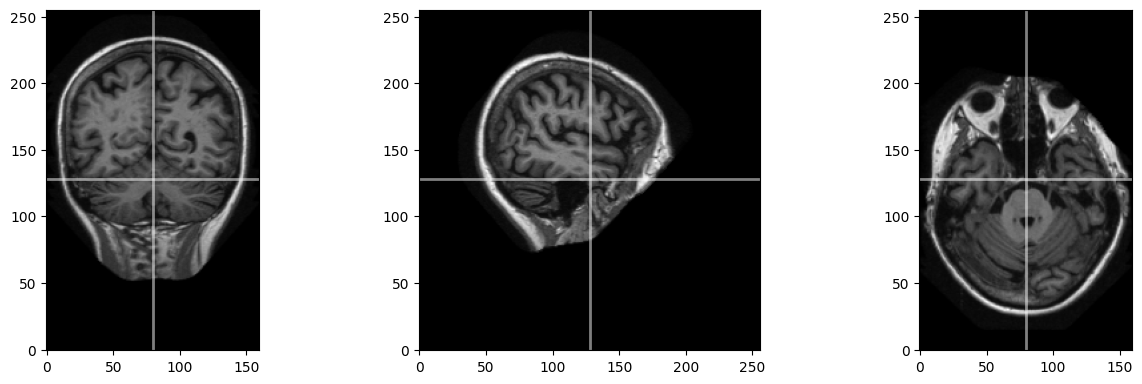

In [70]:
# subject = 'sub-OASIS10003'
def show_MRI_slices(slices):
    """ Display a row of image slices """
    fig, axes = plt.subplots(1, 3, figsize=(12,4), gridspec_kw={'width_ratios': [1, 2, 1]})
    #fig, axes = plt.subplots(1, len(slices), figsize=(10,5))
    fig.tight_layout()
    
    for i, slice in enumerate(slices):
        axes[i].imshow(slice, cmap="gray", origin="lower")
        # Add vertical and horizontal lines to the plot
        axes[i].axhline(y=slice.shape[0]//2, color='w', alpha=0.5, linewidth=2)
        axes[i].axvline(x=slice.shape[1]//2, color='w', alpha=0.5, linewidth=2)
    plt.show()

# Replace the question marks, and uncomment the following lines of code
slice_YZ = image_data[80, :, :]
slice_XZ = image_data[:, 128, :]
slice_XY = image_data[:, :, 128]

rotated_slice = ndimage.rotate(slice_XY, 270)
reflected_slice = np.flip(rotated_slice, axis=1)  # flip horizontally
show_MRI_slices([slice_YZ, reflected_slice, ndimage.rotate(slice_XZ, 360)])
plt.show()

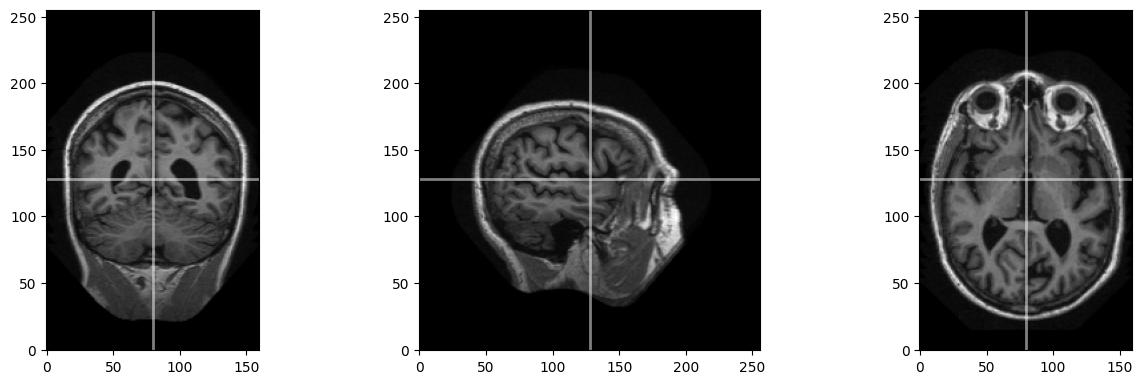

In [71]:
# subject1 = 'sub-OASIS10001'
def show_MRI_slices(slices):
    """ Display a row of image slices """
    fig, axes = plt.subplots(1, 3, figsize=(12,4), gridspec_kw={'width_ratios': [1, 2, 1]})
    fig.tight_layout()
    for i, slice in enumerate(slices):
        axes[i].imshow(slice, cmap="gray", origin="lower")
        # Add vertical and horizontal lines to the plot
        axes[i].axhline(y=slice.shape[0]//2, color='w', alpha=0.5, linewidth=2)
        axes[i].axvline(x=slice.shape[1]//2, color='w', alpha=0.5, linewidth=2)
    plt.show()
    
# Replace the question marks, and uncomment the following lines of code
slice_YZ = image_data1[80, :, :]
slice_XZ = image_data1[:, 128, :]
slice_XY = image_data1[:, :, 128]

rotated_slice = ndimage.rotate(slice_XY, 270)
reflected_slice = np.flip(rotated_slice, axis=1)  # flip horizontally
show_MRI_slices([slice_YZ, reflected_slice, ndimage.rotate(slice_XZ, 360)])
plt.show()

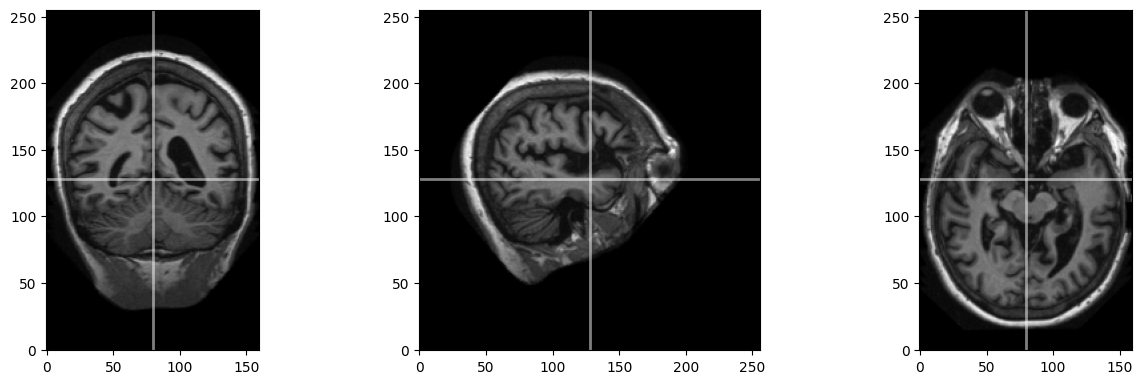

In [72]:
# subject2 = 'sub-OASIS10184'
def show_MRI_slices(slices):
    """ Display a row of image slices """
    fig, axes = plt.subplots(1, 3, figsize=(12,4), gridspec_kw={'width_ratios': [1, 2, 1]})
    fig.tight_layout()
    for i, slice in enumerate(slices):
        axes[i].imshow(slice, cmap="gray", origin="lower")
        # Add vertical and horizontal lines to the plot
        axes[i].axhline(y=slice.shape[0]//2, color='w', alpha=0.5, linewidth=2)
        axes[i].axvline(x=slice.shape[1]//2, color='w', alpha=0.5, linewidth=2)
    plt.show()
    
# Replace the question marks, and uncomment the following lines of code
slice_YZ = image_data2[80, :, :]
slice_XZ = image_data2[:, 128, :]
slice_XY = image_data2[:, :, 128]

rotated_slice = ndimage.rotate(slice_XY, 270)
reflected_slice = np.flip(rotated_slice, axis=1)  # flip horizontally
show_MRI_slices([slice_YZ, reflected_slice, ndimage.rotate(slice_XZ, 360)])
plt.show()

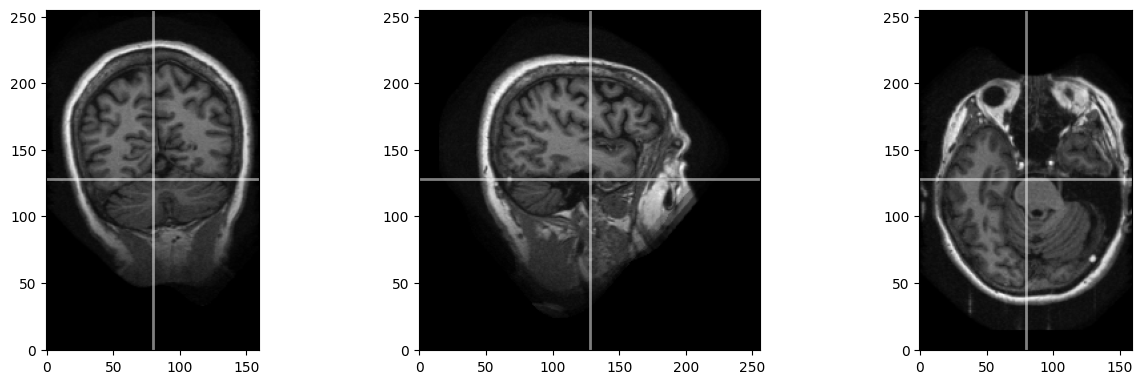

In [73]:
# subject3 = 'sub-OASIS10322'
def show_MRI_slices(slices):
    """ Display a row of image slices """
    fig, axes = plt.subplots(1, 3, figsize=(12,4), gridspec_kw={'width_ratios': [1, 2, 1]})
    fig.tight_layout()
    for i, slice in enumerate(slices):
        axes[i].imshow(slice, cmap="gray", origin="lower")
        # Add vertical and horizontal lines to the plot
        axes[i].axhline(y=slice.shape[0]//2, color='w', alpha=0.5, linewidth=2)
        axes[i].axvline(x=slice.shape[1]//2, color='w', alpha=0.5, linewidth=2)
    plt.show()
    
# Replace the question marks, and uncomment the following lines of code
slice_YZ = image_data3[80, :, :]
slice_XZ = image_data3[:, 128, :]
slice_XY = image_data3[:, :, 128]

rotated_slice = ndimage.rotate(slice_XY, 270)
reflected_slice = np.flip(rotated_slice, axis=1)  # flip horizontally
show_MRI_slices([slice_YZ, reflected_slice, ndimage.rotate(slice_XZ, 360)])
plt.show()

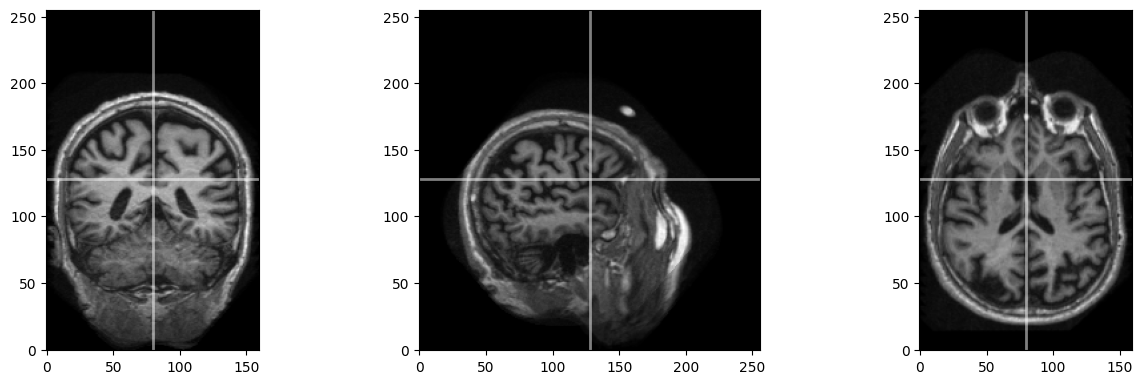

In [74]:
# subject4 = 'sub-OASIS10440' 
def show_MRI_slices(slices):
    """ Display a row of image slices """
    fig, axes = plt.subplots(1, 3, figsize=(12,4), gridspec_kw={'width_ratios': [1, 2, 1]})
    fig.tight_layout()
    for i, slice in enumerate(slices):
        axes[i].imshow(slice, cmap="gray", origin="lower")
        # Add vertical and horizontal lines to the plot
        axes[i].axhline(y=slice.shape[0]//2, color='w', alpha=0.5, linewidth=2)
        axes[i].axvline(x=slice.shape[1]//2, color='w', alpha=0.5, linewidth=2)
    plt.show()
    
# Replace the question marks, and uncomment the following lines of code
slice_YZ = image_data4[80, :, :]
slice_XZ = image_data4[:, 128, :]
slice_XY = image_data4[:, :, 128]

rotated_slice = ndimage.rotate(slice_XY, 270)
reflected_slice = np.flip(rotated_slice, axis=1)  # flip horizontally
show_MRI_slices([slice_YZ, reflected_slice, ndimage.rotate(slice_XZ, 360)])
plt.show()

#### Background removal

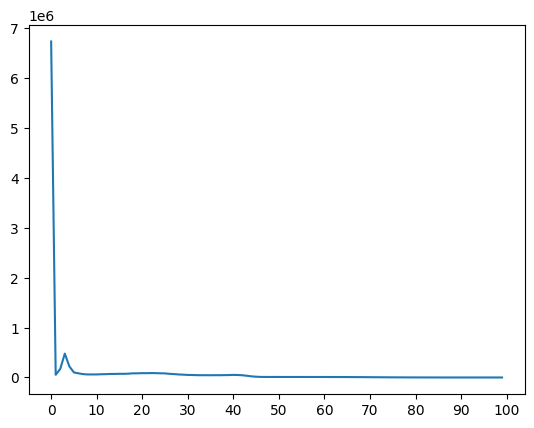

In [65]:
num_bins = 100
plt.figure(dpi=100)
plt.plot(ndimage.histogram(image_data, min=0, max=np.max(image_data), bins=num_bins))
plt.xticks(np.arange(0, num_bins+1, 10))
plt.show()

In the histogram above, there is a large peak close to zero because the voxels making up the large empty space (air) surrounding the head have values at or close to zero. We will now use the image histogram to create a mask that isolates a particular range of intensity values in the image, while setting all other intensity values to zero. Although it is a very simple approach, it can be useful for background removal (and also for segmenting the grey or white matter).

We start by manually defining the range of intensity values that we consider background (the window containing the small peak). Based on the histogram above, we will choose a range from bins 1 to 5. Since the x axis of the histogram is bin numbers, rather than intensity values, we need to determine what intensities corresponding to bins 1 to 5. Since we know the histogram divided the range from 0 to the maximum intensity value in the image, into 100 bins, we can divide the max intensity value by 100 to get the width of each bin, then multiply by the values we observed on the x axis.

Next we create two binary masks of the image: one mask for the voxels whose intensity is greater than background_min and the other for the voxels whose intensity value is less than background_max. We combine the two masks by adding them: any voxel that is in the range between background_min and background_max will have a value of 2. The resulting background_mask selects only voxels belonging to the background area that we want to remove from the image.

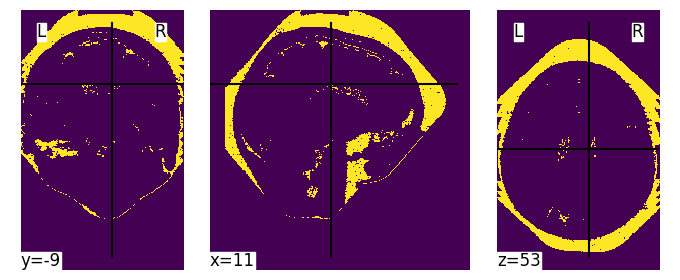

In [66]:
# Cast the image data to int16
image_data = image_data.astype(np.int16)

# Basic background mask
background_min = ((np.max(image_data)) / num_bins) * 1
background_max = ((np.max(image_data)) / num_bins) * 5
background_mask = np.where(image_data > background_min, 1, 0) + np.where(image_data < background_max, 1, 0)
background_mask = np.where(background_mask == 2, 1, 0)

# Use the affine spatial transform to turn the binary mask into a NIfTI file
#background_mask_nifti = nibabel.Nifti1Image(background_mask, affine_spatial_transform) #makes an error
background_mask_nifti = nibabel.Nifti1Image(background_mask.astype(np.uint8), affine_spatial_transform)


# Plot the result using Nilearn's plotting function (or a Matplotlib alternative)
plotting.plot_img(background_mask_nifti)
plt.show()